<a href="https://colab.research.google.com/github/super-sg/Data-Analysis-and-Modeling-Mini-Projects/blob/main/Labour_Training_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labour Training Evaluation Data Analysis and Modeling

# We will create a Linear Regression model for predicting 'Earnings in 1978' and check all the assumptions for Linear Regression

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df=pd.read_csv('/content/LabourTrainingEvaluationData.csv')

In [221]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


# Handling null values and duplicates :

In [222]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [224]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
for col in ['earnings_1974', 'earnings_1975', 'earnings_1978']:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

In [225]:
df.columns

Index(['age', 'eduacation', 'race', 'hisp', 'maritalstatus', 'nodeg',
       'earnings_1974', 'earnings_1975', 'earnings_1978'],
      dtype='object')

In [226]:
df.isnull().sum()

,0
age,0
eduacation,0
race,0
hisp,0
maritalstatus,0
nodeg,0
earnings_1974,0
earnings_1975,0
earnings_1978,0


In [227]:
df.duplicated().sum()

np.int64(2002)

In [228]:
df.drop_duplicates(inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13990 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            13990 non-null  int64  
 1   eduacation     13990 non-null  object 
 2   race           13990 non-null  object 
 3   hisp           13990 non-null  object 
 4   maritalstatus  13990 non-null  object 
 5   nodeg          13990 non-null  int64  
 6   earnings_1974  13990 non-null  float64
 7   earnings_1975  13990 non-null  float64
 8   earnings_1978  13990 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


# Finding out and treating outliers :

In [230]:
numerical_cols = ['age', 'nodeg', 'earnings_1974', 'earnings_1975', 'earnings_1978']

<Axes: >

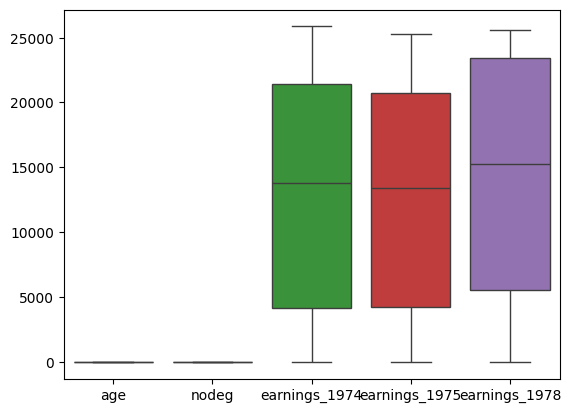

In [231]:
sns.boxplot(data=df[numerical_cols])

In [232]:
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers

for col, outlier_df in outliers.items():
    print(f"Outliers in column '{col}':")
    display(outlier_df)

Outliers in column 'age':


,age,eduacation,race,hisp,maritalstatus,nodeg,earnings_1974,earnings_1975,earnings_1978


Outliers in column 'nodeg':


,age,eduacation,race,hisp,maritalstatus,nodeg,earnings_1974,earnings_1975,earnings_1978


Outliers in column 'earnings_1974':


,age,eduacation,race,hisp,maritalstatus,nodeg,earnings_1974,earnings_1975,earnings_1978


Outliers in column 'earnings_1975':


,age,eduacation,race,hisp,maritalstatus,nodeg,earnings_1974,earnings_1975,earnings_1978


Outliers in column 'earnings_1978':


,age,eduacation,race,hisp,maritalstatus,nodeg,earnings_1974,earnings_1975,earnings_1978


# Linear Regression :

In [233]:
cat_cols = ['eduacation', 'race', 'hisp', 'maritalstatus']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [234]:
X = df[['age', 'eduacation', 'race', 'hisp', 'maritalstatus', 'nodeg', 'earnings_1974', 'earnings_1975']]
y = df['earnings_1978']

In [235]:
categorical_features = ['eduacation', 'race', 'hisp', 'maritalstatus']
numeric_features = ['age', 'nodeg', 'earnings_1974', 'earnings_1975']

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [237]:
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_features)
], remainder='passthrough')

In [238]:
model = make_pipeline(preprocessor, LinearRegression())

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['eduacation', 'race', 'hisp',
                                                   'maritalstatus'])])),
                ('linearregression', LinearRegression())])

In [241]:
y_pred = model.predict(X_test)
y_pred

array([ 3522.27634039, 23681.10135595,  8084.10905099, ...,
       20787.54614708, 22848.09621323,  5421.93252048])

In [242]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 52730506.03400029
R² Score: 0.3850602845208474


# About 38.4% of the variance in earnings in 1978 can be explained by the given features (age, education, race, hispanic, marital status, earnings in 1974/75, etc.).

# MSE shows the average squared prediction error. Since earnings are in the tens of thousands, this scale is expected but indicates moderate spread.

# Residual Analysis

In [243]:
residuals = y_test - y_pred

<Figure size 1400x400 with 0 Axes>

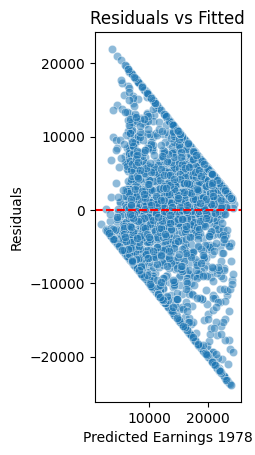

<Figure size 1400x400 with 0 Axes>

In [244]:
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Earnings 1978')
plt.ylabel('Residuals')

plt.figure(figsize=(14, 4))

Text(0.5, 1.0, 'Histogram of Residuals')

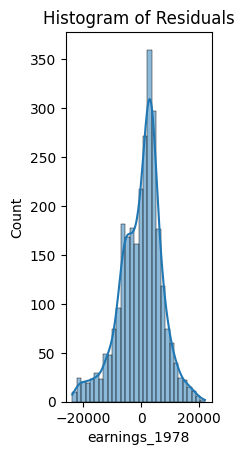

In [245]:
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')

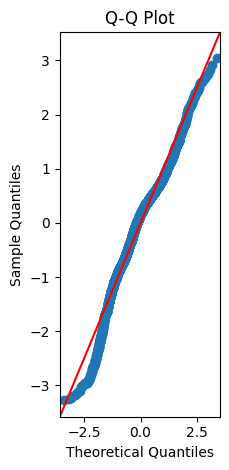

In [246]:
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Checking Multicollinearity

In [247]:
# Re-create X_encoded using the updated preprocessor to check VIF with OrdinalEncoder
X_encoded = preprocessor.fit_transform(X)

# Convert the result to a DataFrame for VIF calculation
X_encoded_df = pd.DataFrame(X_encoded, columns=[f'feature_{i}' for i in range(X_encoded.shape[1])])

# If the original X had column names, try to preserve them or use a mapping
# For simplicity here, I'm using generic names. A better approach would involve
# getting the feature names from the OrdinalEncoder and passthrough columns.

vif_data = pd.DataFrame()
# Need to handle potential non-numeric types after transformation if remainder='passthrough'
# includes non-numeric data, though in this case it should be fine as numeric_features
# were already numerical.
# Ensure all columns are numeric for VIF calculation
X_encoded_df = X_encoded_df.apply(pd.to_numeric, errors='coerce')
X_encoded_df = X_encoded_df.dropna(axis=1) # Drop columns that could not be converted

vif_data["feature"] = X_encoded_df.columns
# Ensure no division by zero in VIF calculation for columns with zero variance
vif_data["VIF"] = [variance_inflation_factor(X_encoded_df.values, i) for i in range(X_encoded_df.shape[1])]

print("\nTop features by VIF (to check multicollinearity):")
print(vif_data.sort_values(by="VIF", ascending=False).head(10))


Top features by VIF (to check multicollinearity):
     feature        VIF
6  feature_6  11.073906
4  feature_4  10.468154
7  feature_7  10.326089
2  feature_2   8.599186
1  feature_1   8.430004
0  feature_0   7.006485
5  feature_5   2.882981
3  feature_3   1.753694
